<a href="https://colab.research.google.com/github/SewoongLee/reproduce-ai2thor-colab/blob/main/AI2_THOR_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disclaimer

This code is reproduced with reference to https://github.com/allenai/ai2thor-colab

In [1]:
# ⏰ Let's measure the total run time of this notebook!
import time
start_time = time.time()

# Installation

⚡ _Note_: AI2-THOR often runs significantly _slower_ using Colab's runtime than it does with a local runtime. However, in many cases, it is nice to explore without installing anything locally and not all devices are compatible with running AI2-THOR (e.g., Windows devices, tablets, phones).

In [2]:
!apt --fix-broken install
!apt-get update > /dev/null

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following package was automatically installed and is no longer required:
  libxfont2
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
!apt-get install -y xvfb mesa-utils libgl1-mesa-dri > /dev/null
!pip install --upgrade ai2thor ai2thor-colab > /dev/null
!pip install pyglet==1.5.11 > /dev/null

In [4]:
import os

os.system('Xvfb :1 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':1'

In [5]:
import ai2thor
import ai2thor_colab

from ai2thor.controller import Controller
from ai2thor_colab import (
    plot_frames,
    show_objects_table,
    side_by_side,
    overlay,
    show_video
)

ai2thor_colab.start_xserver()

print("AI2-THOR Version: " + ai2thor.__version__)

controller = Controller()

AI2-THOR Version: 5.0.0


# Workspace

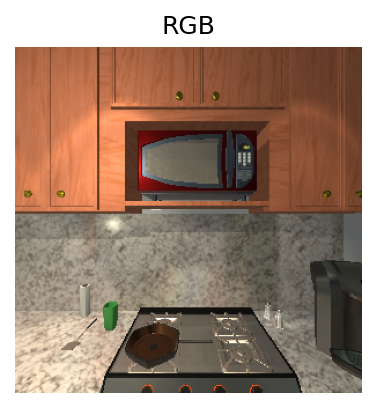

In [6]:
plot_frames(controller.last_event)

# Visualizations

## Plot Frames

Visualize each frame and image modality available on an Event.

In [7]:
import ai2thor.controller
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

controller = ai2thor.controller.Controller()

controller.reset(
    width=500,
    height=500,
    renderDepthImage=False,
    renderNormalsImage=False,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False
)

frames = []

rotate = 90
degrees = 5
for _ in tqdm(range(rotate // degrees)):
  controller.step(action="RotateLeft", degrees=degrees)
  frames.append(controller.last_event.frame)

100%|██████████| 18/18 [00:19<00:00,  1.08s/it]


In [8]:
show_video(frames, fps=1)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Show Objects Table

Filter, sort, and view metadata for each object in an Event. Note that we have left off `objectOrientedBoundingBox`, `axisAlignedBoundingBox`, and `receptacleObjectIds` because they are too big for the table.

In [9]:
show_objects_table(controller.last_event.metadata['objects'])

Object Metadata. Not showing objectOrientedBoundingBox, axisAlignedBoundingBox, and receptacleObjectIds for clarity.


,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,Apple,Apple|-01.09|+00.96|-00.02,Apple_f33eaaa0,-1.0950,0.9633,-0.0199,3.4616,309.2326,269.8893,1.6480,...,0.0,True,False,False,0.20,[Food],Apple_10,[CounterTop|-01.24|+00.97|-00.64],None,False
1,Bottle,Bottle|-01.37|+00.89|+02.70,Bottle_8e7e267f,-1.3720,0.8862,2.6990,359.9899,0.0063,0.0053,4.1806,...,0.0,True,False,False,0.20,[Glass],Bottle_1,[Shelf|-01.64|+00.88|+02.72],None,False
2,Bowl,Bowl|+00.79|+00.90|-00.12,Bowl_148b0fbf,0.7941,0.9004,-0.1182,0.0000,0.0029,-0.0001,1.3826,...,0.0,True,False,False,0.47,[Plastic],Bowl_10,[CounterTop|+00.93|+00.95|-00.21],None,False
3,Bread,Bread|-00.78|+01.00|+00.21,Bread_5dd97b2d,-0.7790,0.9967,0.2100,0.0000,258.6418,0.0000,1.6576,...,0.0,True,False,False,0.70,[Food],Bread_10,[CounterTop|-01.24|+00.97|-00.64],None,False
4,ButterKnife,ButterKnife|-01.33|+00.92|-00.88,ButterKnife_42394ea7,-1.3258,0.9249,-0.8847,-0.0002,10.6788,269.9985,1.3754,...,0.0,True,False,False,0.08,[Metal],ButterKnife_1,[CounterTop|-01.24|+00.97|-00.64],None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Tomato,Tomato|-00.87|+00.96|-00.10,Tomato_9c51c4ef,-0.8701,0.9626,-0.0960,0.0044,0.0074,0.0816,1.4466,...,0.0,True,False,False,0.12,[Food],Tomato_10,[CounterTop|-01.24|+00.97|-00.64],None,False
63,Vase,Vase|-01.44|+00.18|+02.58,Vase_7932859a,-1.4350,0.1843,2.5830,359.9788,-0.0010,359.9589,4.1551,...,0.0,True,False,False,1.00,[Ceramic],Vase_Decorative_1,"[Floor|+00.00|+00.00|+00.00, Shelf|-01.64|+00....",None,False
64,Vase,Vase|-01.73|+00.56|+02.66,Vase_b5cbe7f7,-1.7320,0.5561,2.6619,0.0073,0.0020,-0.0046,4.2921,...,0.0,True,False,False,1.00,[Ceramic],Vase_Medium_2,[Shelf|-01.64|+00.55|+02.72],None,False
65,Window,Window|-03.00|+01.00|-02.64,Window_e6cbc2b8,-2.9960,0.9980,-2.6400,90.0000,0.0001,0.0000,3.3042,...,0.0,False,False,False,0.00,None,,None,None,False


## Show Video

Builds a video from a sequence of image frames.

In [10]:
controller.reset(
    width=500,
    height=500,
    renderDepthImage=False,
    renderNormalsImage=False,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False
)
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(90 // 5)
]
show_video(frames, fps=5)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Side By Side Frames

Shows 2 image frames side-by-side. This is often nice to visualize the before and after results from an action.

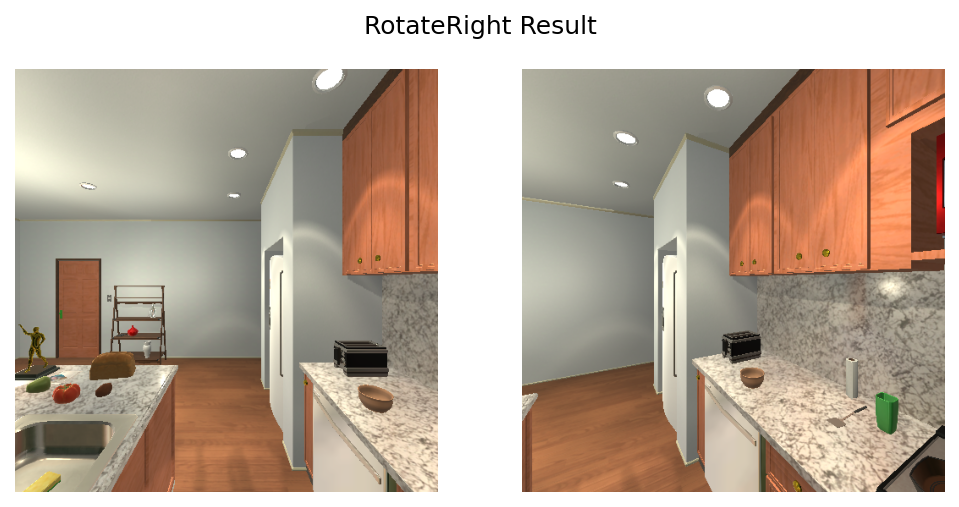

In [11]:
side_by_side(
    frame1=controller.last_event.frame,
    frame2=controller.step("RotateRight", degrees=30).frame,
    title="RotateRight Result"
)

## Overlay Frames

Picking up Apple|-01.09|+00.96|-00.02


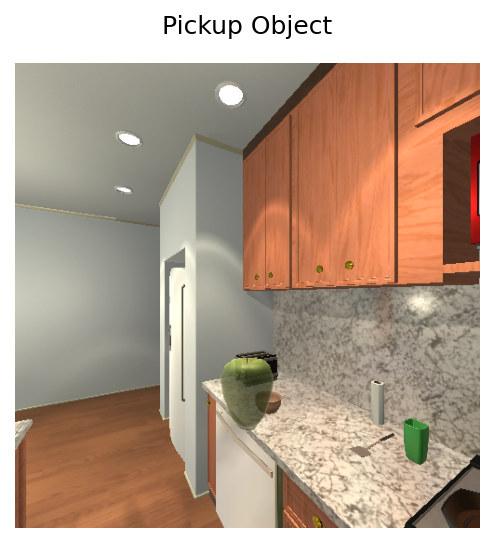

In [12]:
objectId = next(obj["objectId"] for obj in controller.last_event.metadata['objects'] if obj['pickupable'])
print("Picking up " + objectId)

start_frame = controller.last_event.frame
pickup_frame = controller.step(
    action="PickupObject",
    objectId=objectId,
    forceAction=True
).frame

#@markdown `frame2_alpha` controls the opacity that the 2nd frame has, when blended over the 1st frame.
#@markdown Notice with a 0.75 opacity, the status's base appears see-throguh.

overlay(
    frame1=start_frame,
    frame2=pickup_frame,
    title="Pickup Object",
    frame2_alpha=0.75 #@param {type: "slider", min: 0.01, max: 0.99, step: 0.01}
)

In [13]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f}sec")

Elapsed Time: 178.05sec
